# Chapter 8. Axes

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 8.1 Swapping X- and Y-Axes

> For a scatter plot, it is trivial to change what goes on the vertical axis and what goes on the horizontal axis: just exchange the variables mapped to x and y. But not all the geoms in **ggplot** treat the x- and y-axes equally. For example, box plots summarize the data along the y-axis, the lines in line graphs move in only one direction along the x-axis, error bars have a single x value and a range of y values, and so on. If you’re using these geoms and want them to behave as though the axes are swapped, `coord_flip()` is what you need.

> When you swap the axes, the items still go from the origin outward, which in this case will be from bottom to top—but this conflicts with the normal way of reading, from top to bottom.

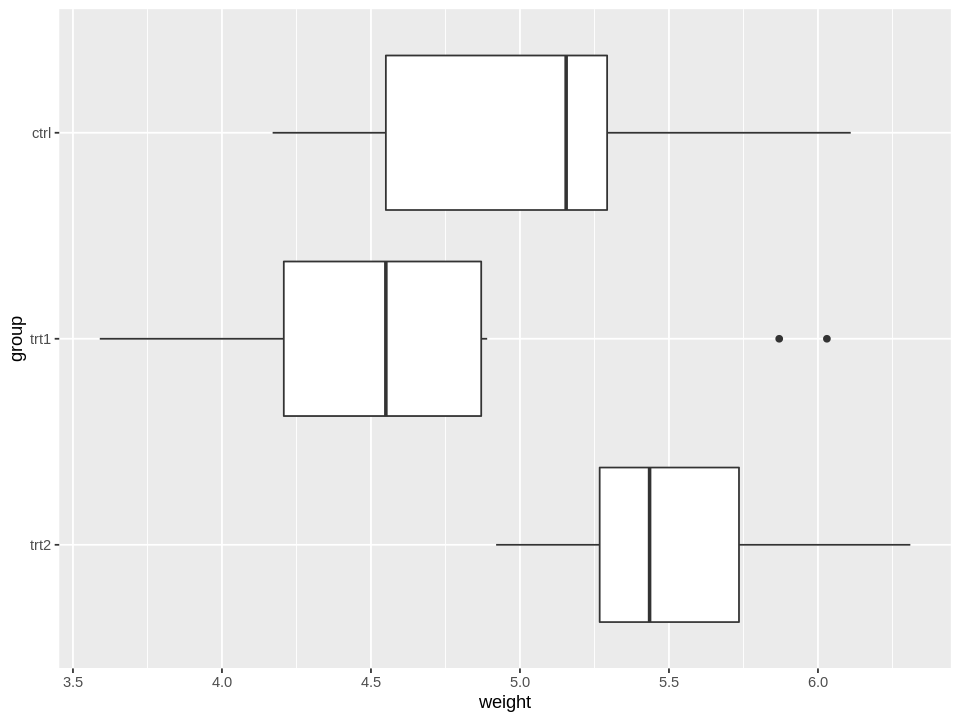

In [2]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  coord_flip() +
  scale_x_discrete(limits = rev(levels(PlantGrowth$group)))

## 8.2 Setting the Range of a Continuous Axis

> `ylim()` is shorthand for setting the limits with `scale_y_continuous()`. (The same is true for `xlim()` and `scale_x_continuous()`.)

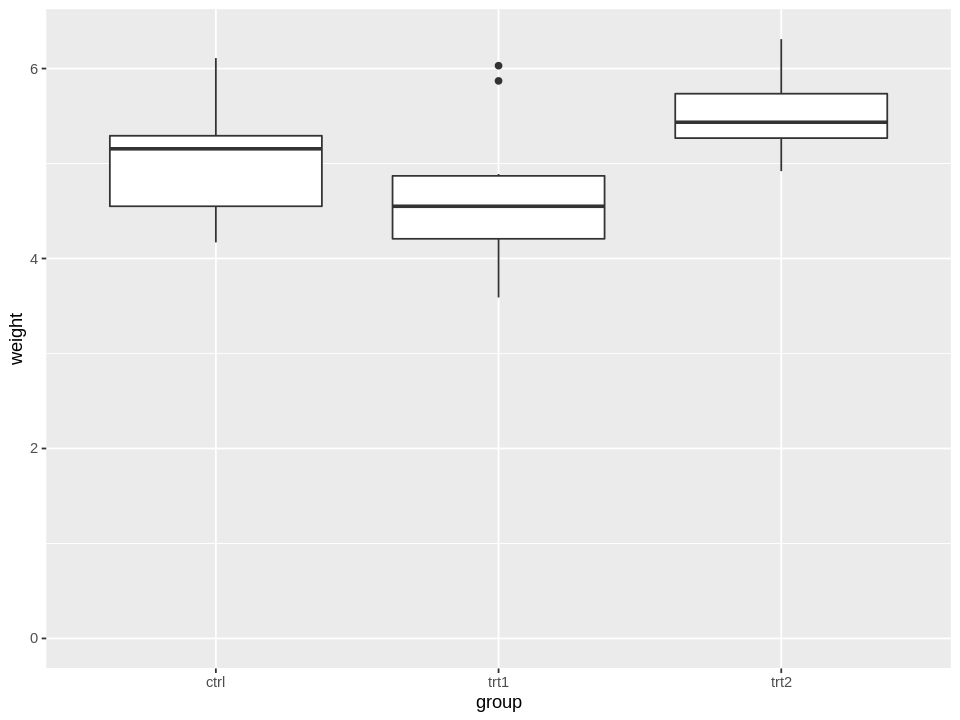

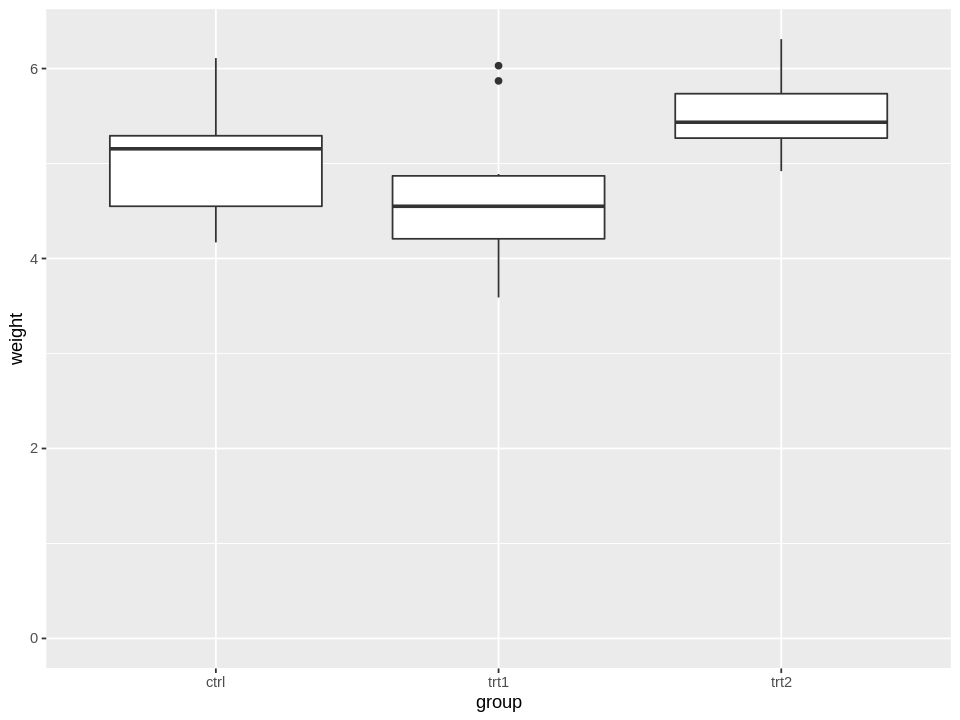

In [3]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  ylim(0, max(PlantGrowth$weight))

qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  expand_limits(y = 0)

> In **ggplot**, there are two ways of setting the range of the axes. The first way is to modify the *scale*, and the second is to apply a *coordinate transform*. When you modify the limits of the x or y scale, any data outside of the limits is removed—that is, the out-of-range data is not only not displayed, it is removed from consideration entirely. (It will also print a warning when this happens.) With a coordinate transform, the data is not clipped; in essence, it zooms in or out to the specified range.

Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”


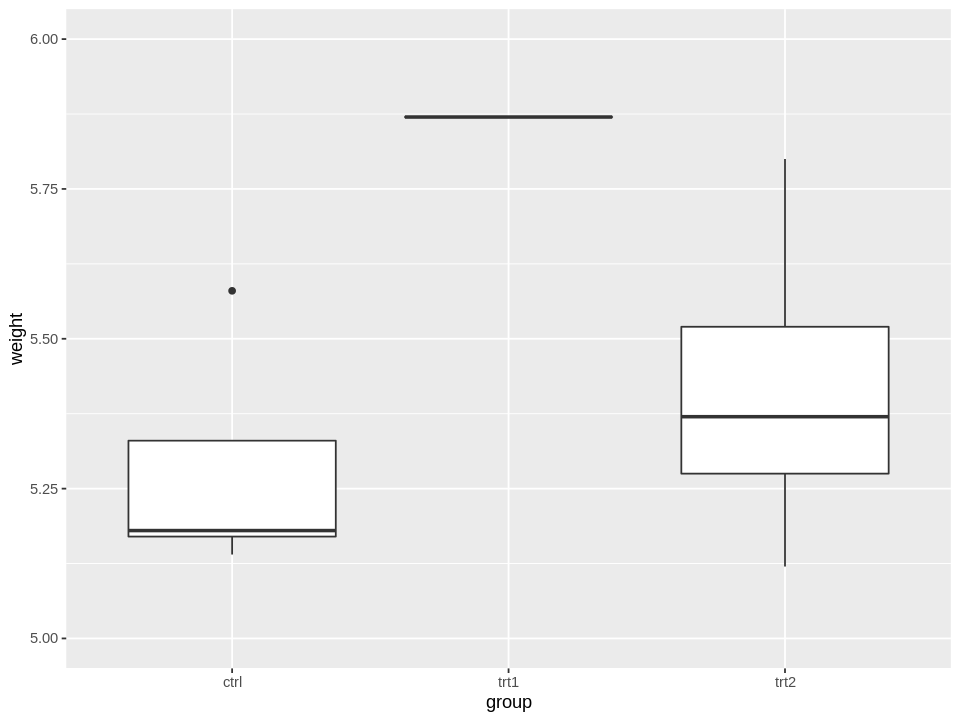

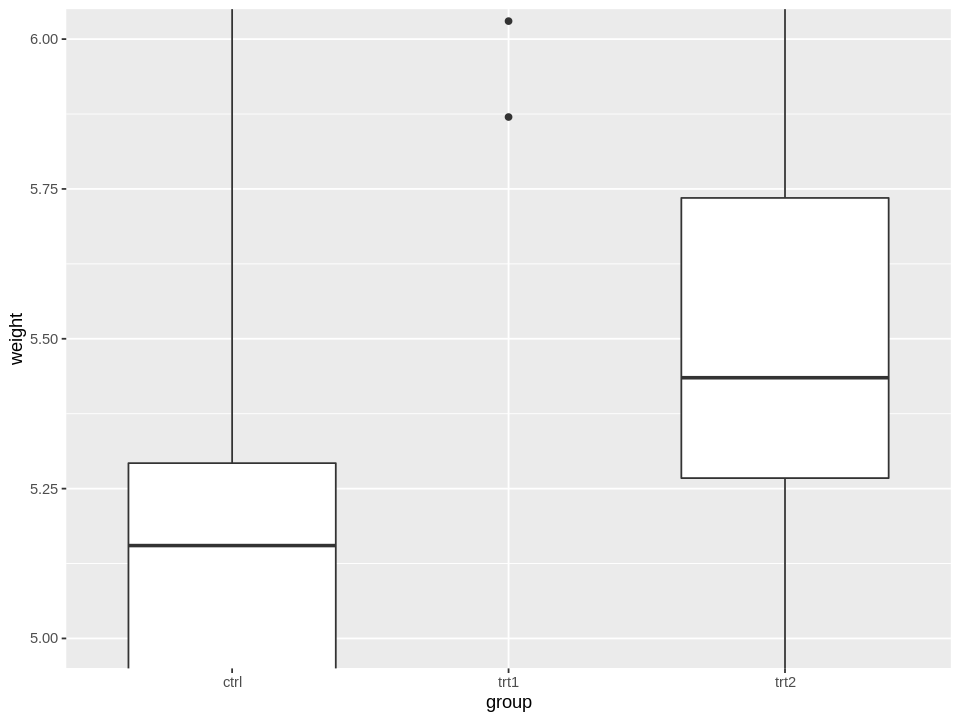

In [4]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  scale_y_continuous(limits = c(5, 6))

qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  coord_cartesian(ylim = c(5, 6))

## 8.3 Reversing a Continuous Axis

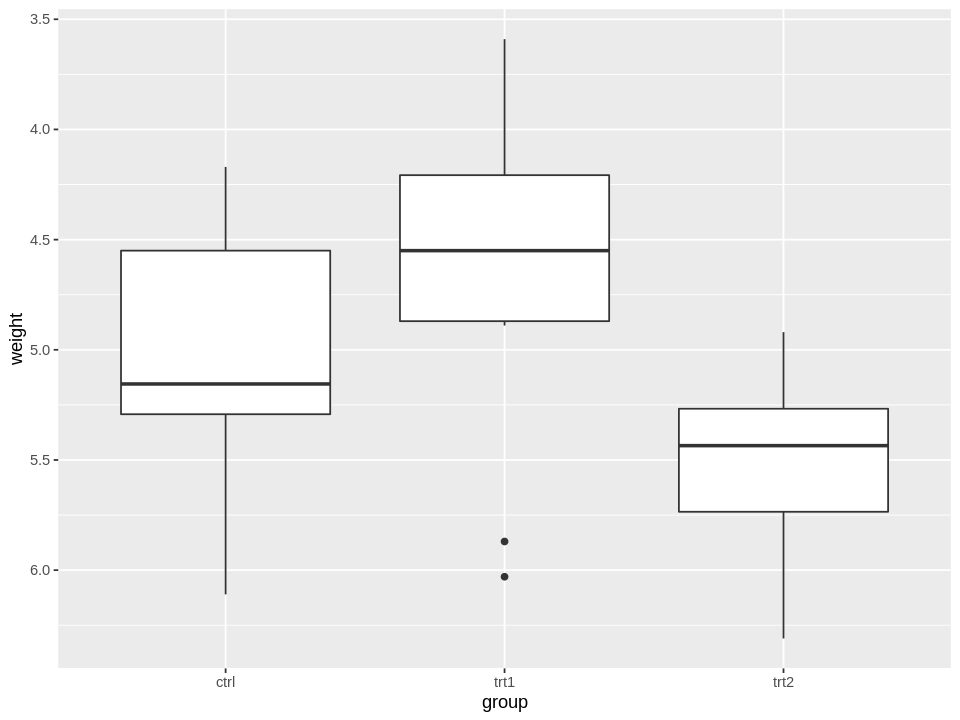

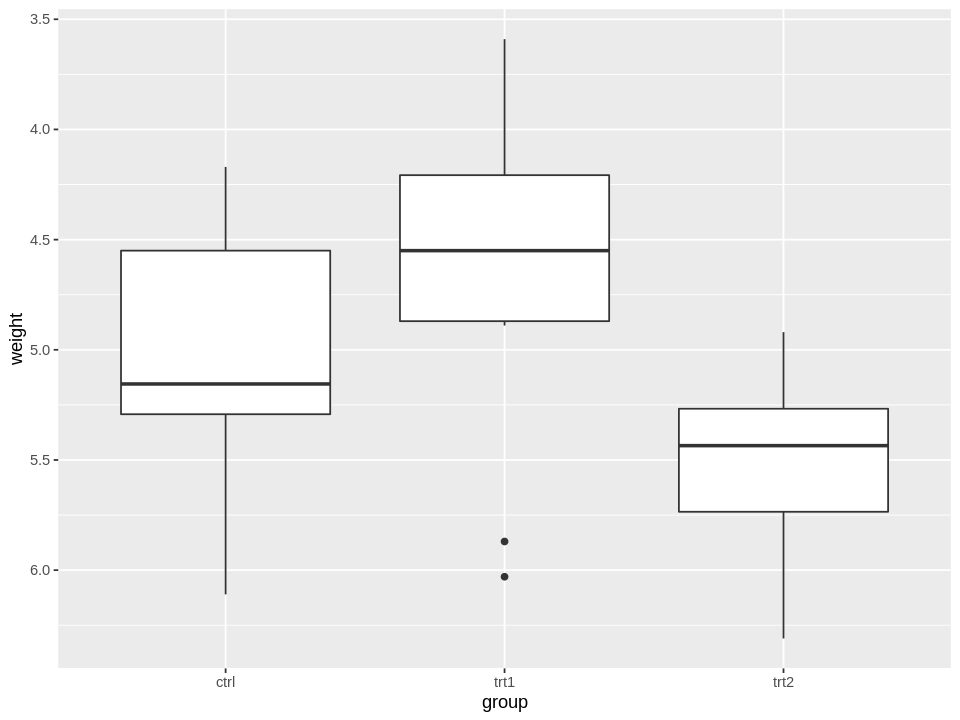

In [5]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  ylim(rev(range(PlantGrowth$weight)))

qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  scale_y_reverse()

## 8.4 Changing the Order of Items on a Categorical Axis

Warning message:
“Removed 20 rows containing missing values (stat_boxplot).”


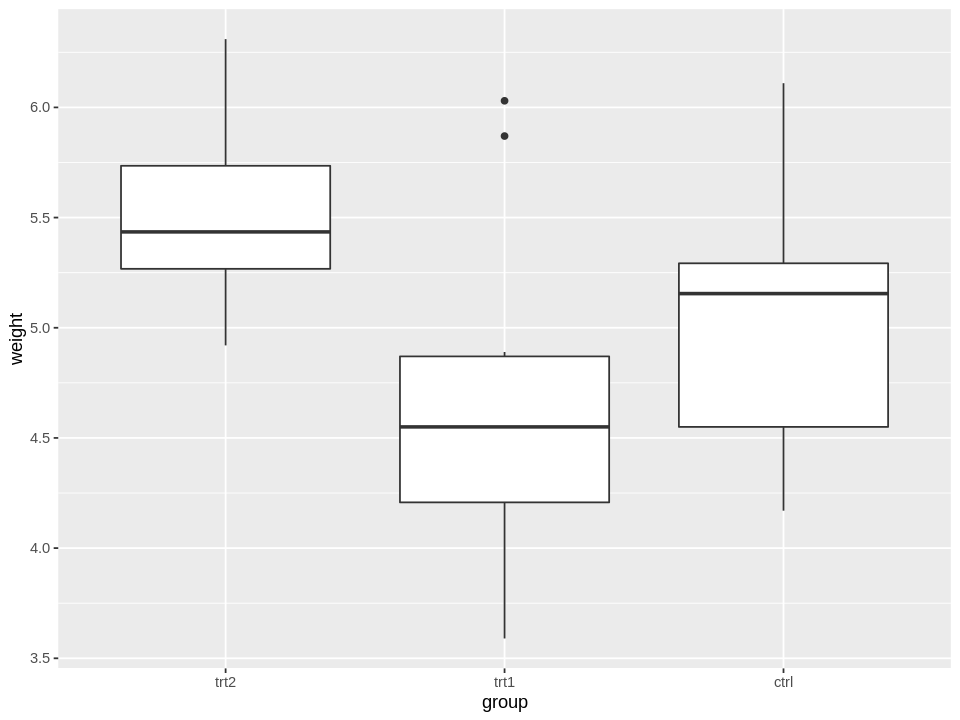

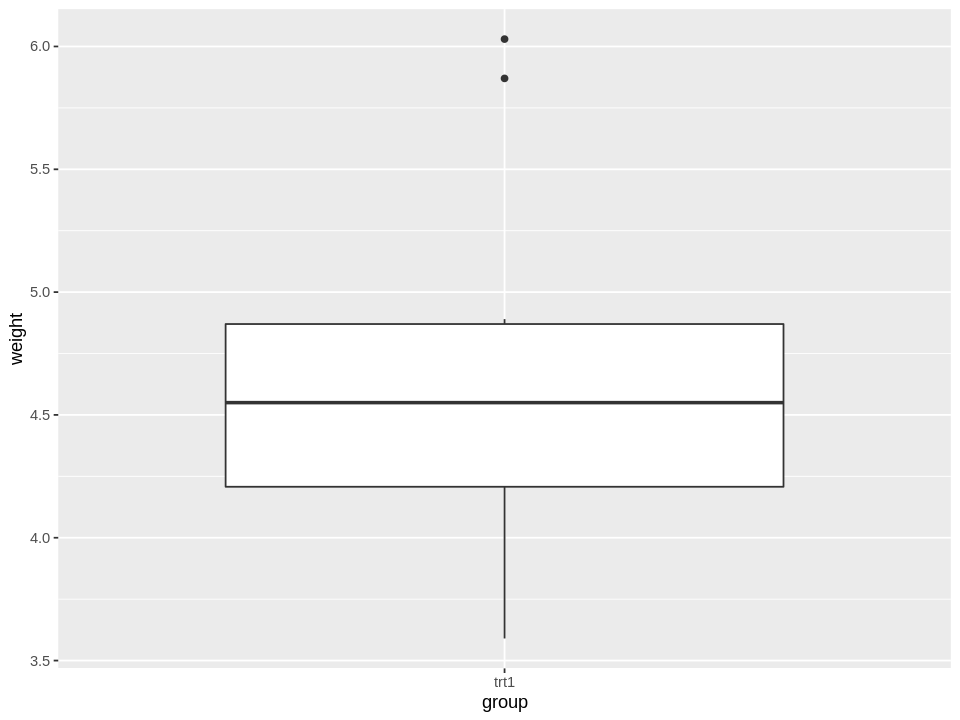

In [6]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  scale_x_discrete(limits = rev(levels(PlantGrowth$group)))

qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  scale_x_discrete(limits = levels(PlantGrowth$group)[-c(1, 3)])

## 8.5 Setting the Scaling Ratio of the X- and Y-Axes

In [7]:
summary(gcookbook::marathon)
slice_sample(gcookbook::marathon, n = 10)
?gcookbook::marathon

      Half             Full      
 Min.   : 66.80   Min.   :141.5  
 1st Qu.: 87.90   1st Qu.:192.2  
 Median : 99.64   Median :222.0  
 Mean   :101.87   Mean   :228.6  
 3rd Qu.:112.48   3rd Qu.:256.5  
 Max.   :172.30   Max.   :371.8  

Half,Full
<dbl>,<dbl>
107.78333,337.7000
97.60000,230.5833
70.63333,147.2333
81.53333,202.0000
106.13333,254.0333
140.98333,291.3333
76.01667,163.0833
125.70000,276.2833
104.68333,221.0000


marathon {gcookbook},R Documentation


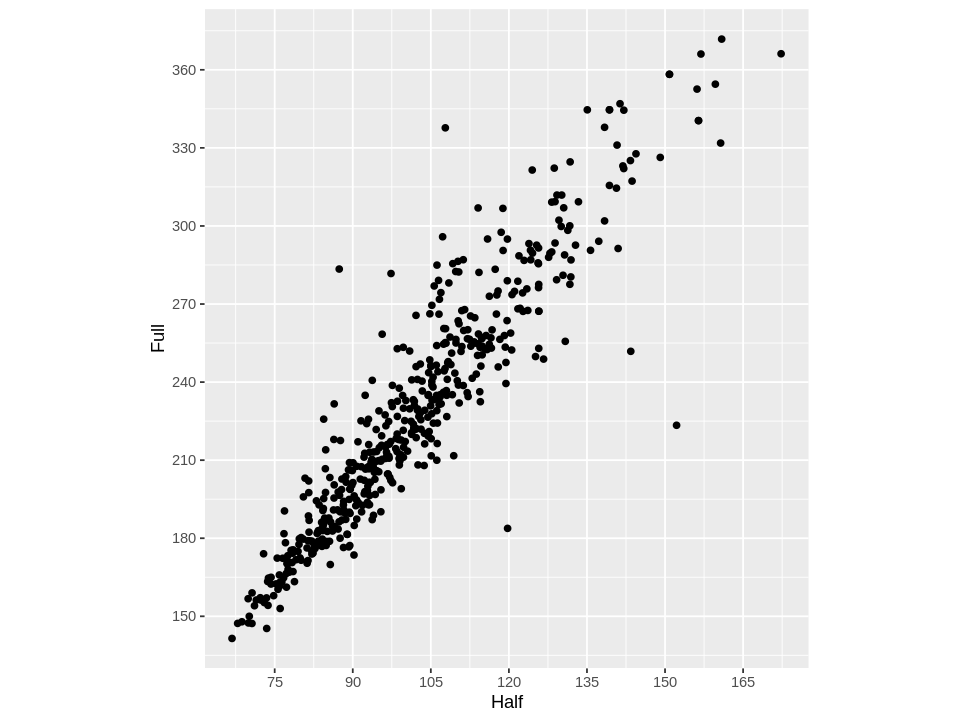

In [8]:
qplot(Half, Full, data = gcookbook::marathon) +
  coord_fixed(ratio = 1 / 2) +
  scale_x_continuous(breaks = seq(0, 1000, 15)) +
  scale_y_continuous(breaks = seq(0, 1000, 30))

## 8.6 Setting the Positions of Tick Marks

Warning message:
“Removed 10 rows containing missing values (stat_boxplot).”


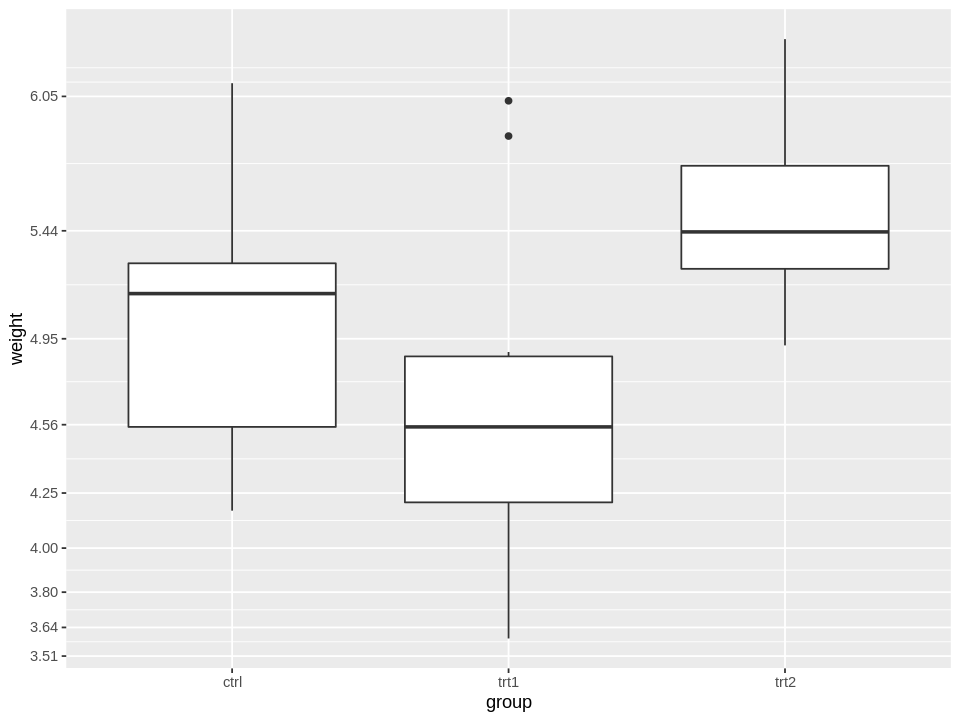

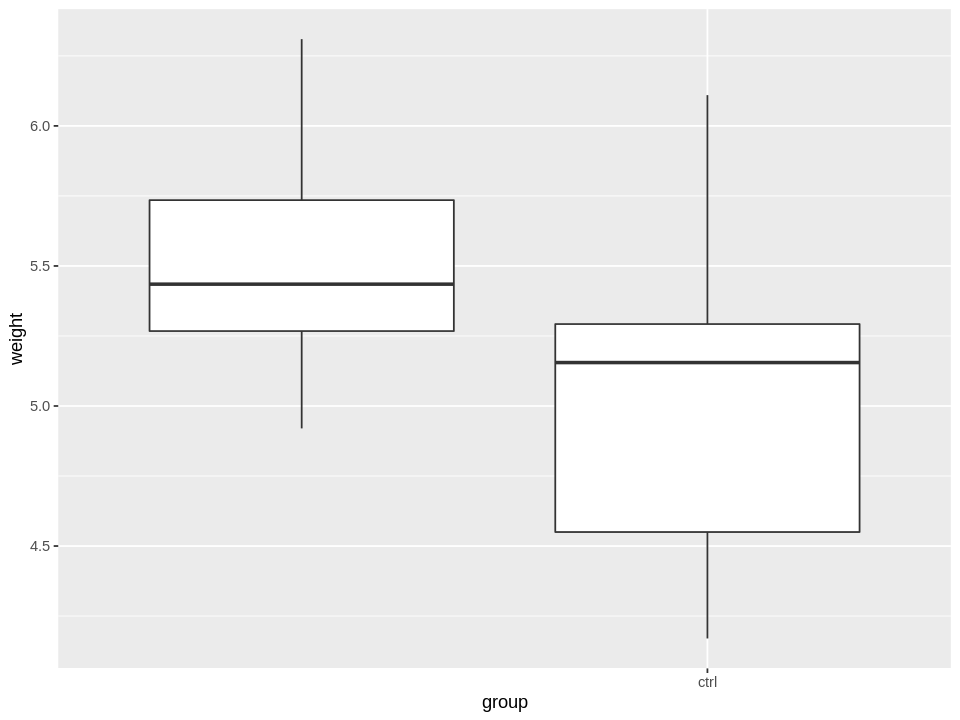

In [9]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  scale_y_continuous(breaks = round(3 + 1.25^(-3:6), 2))

qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  scale_x_discrete(breaks = c("ctrl"), limits = c("trt2", "ctrl"))

## 8.7 Removing Tick Marks and Labels

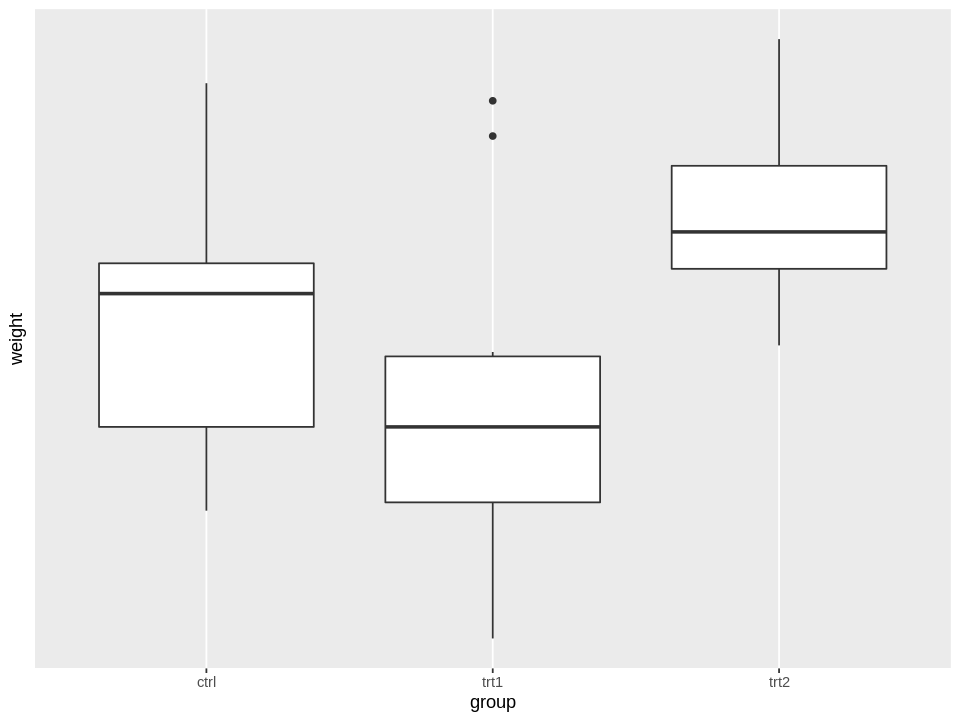

In [10]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  theme(
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.minor.y = element_blank(),
  )

## 8.8 Changing the Text of Tick Labels

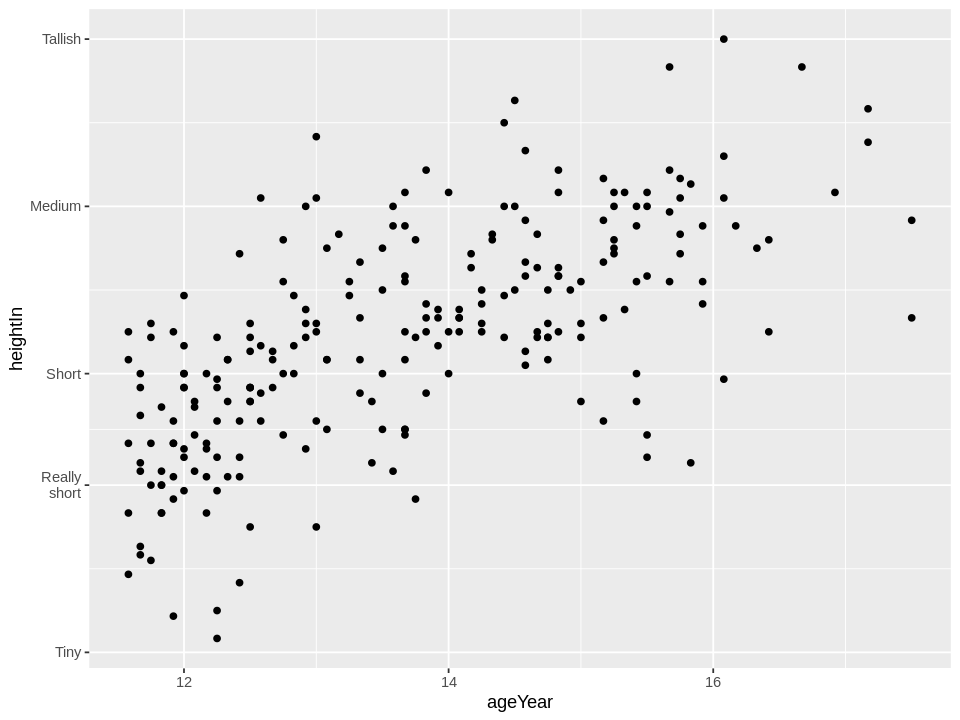

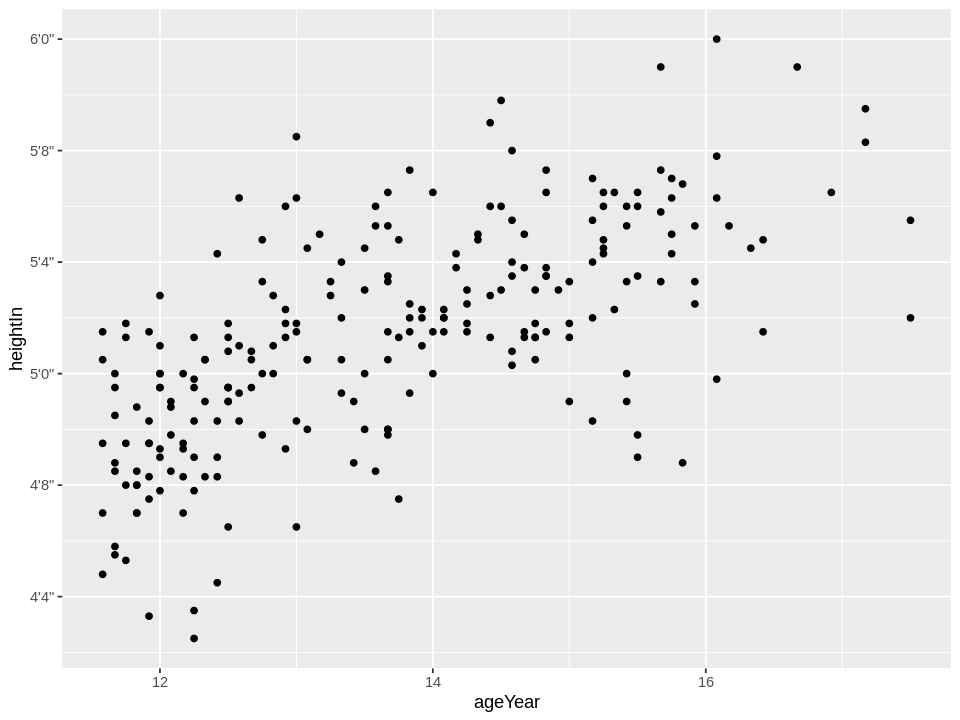

In [11]:
qplot(ageYear, heightIn, data = gcookbook::heightweight) +
  scale_y_continuous(
    breaks = c(50, 56, 60, 66, 72),
    labels = c("Tiny", "Really\nshort", "Short", "Medium", "Tallish"),
  )

qplot(ageYear, heightIn, data = gcookbook::heightweight) +
  scale_y_continuous(
    breaks = seq(0, 100, 4),
    labels = function(xs) {
      map(xs, ~str_interp("${. %/% 12}'${. %% 12}\""))
    }
  )

## 8.9 Changing the Appearance of Tick Labels

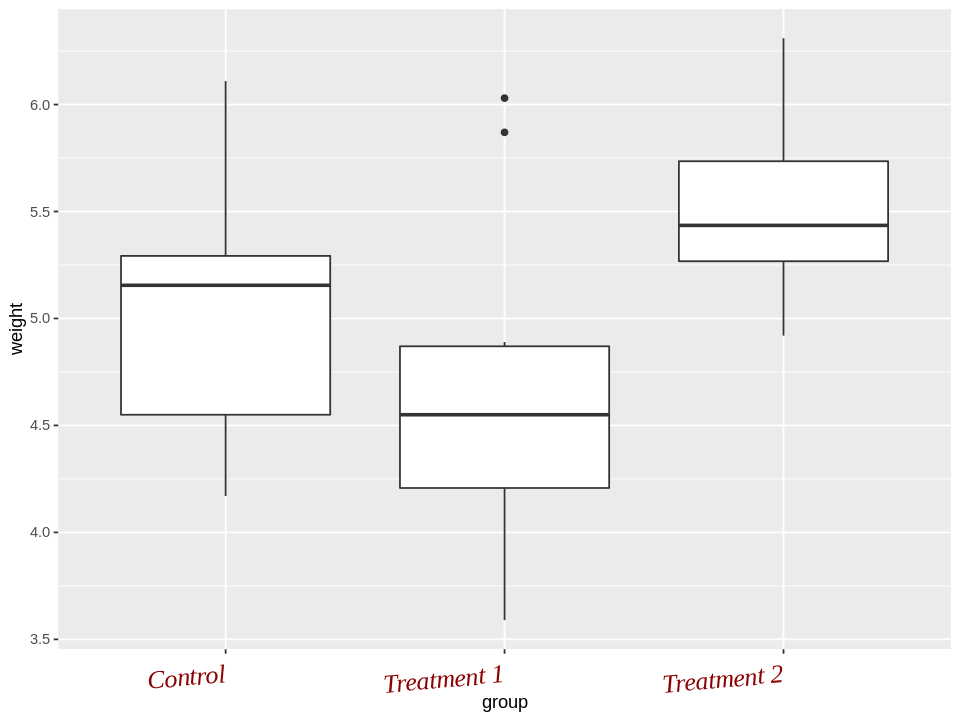

In [12]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  scale_x_discrete(
    labels = c(
      "ctrl" = "Control",
      "trt1" = "Treatment 1",
      "trt2" = "Treatment 2"
    )
  ) +
  theme(
    axis.text.x = element_text(
      angle = 5,
      color = "darkred",
      face = "italic",
      family = "Times",
      hjust = 1,
      size = rel(1.75),
      vjust = .5
    )
  )

## 8.10 Changing the Text of Axis Labels

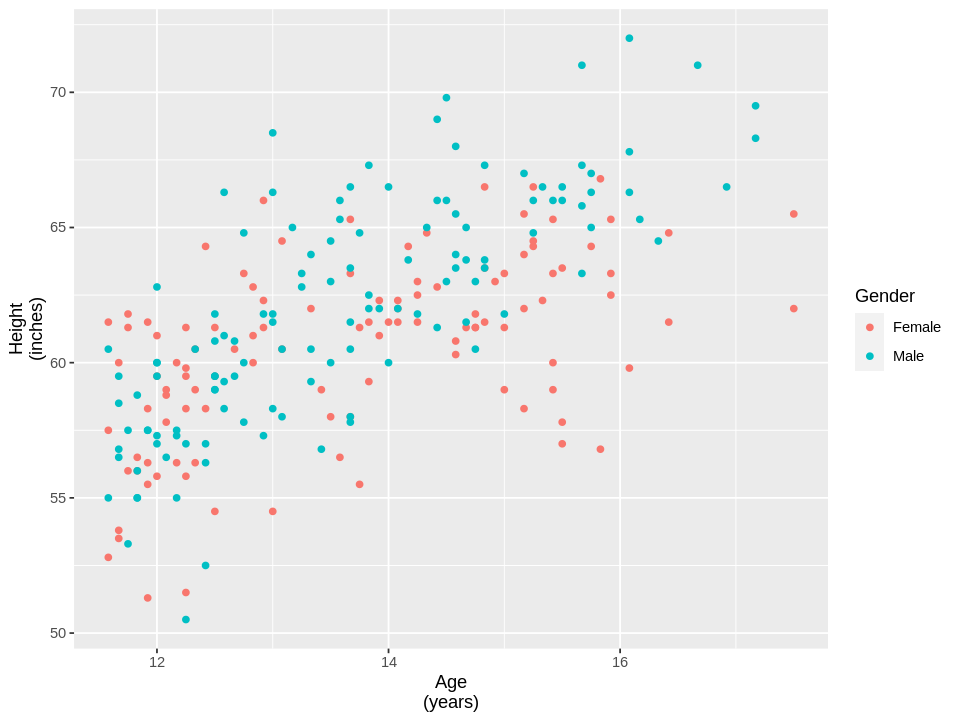

In [13]:
qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  labs(x = "Age\n(years)", y = "Height\n(inches)") +
  scale_color_discrete(
    labels = c("f" = "Female", "m" = "Male"),
    name = "Gender"
  )

## 8.11 Removing Axis Labels

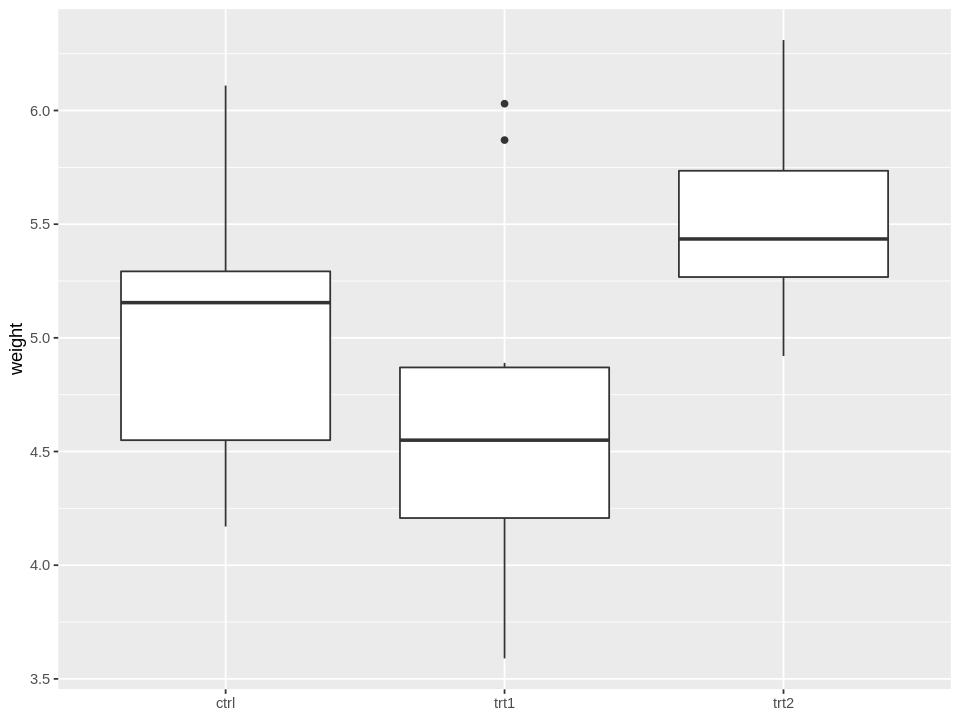

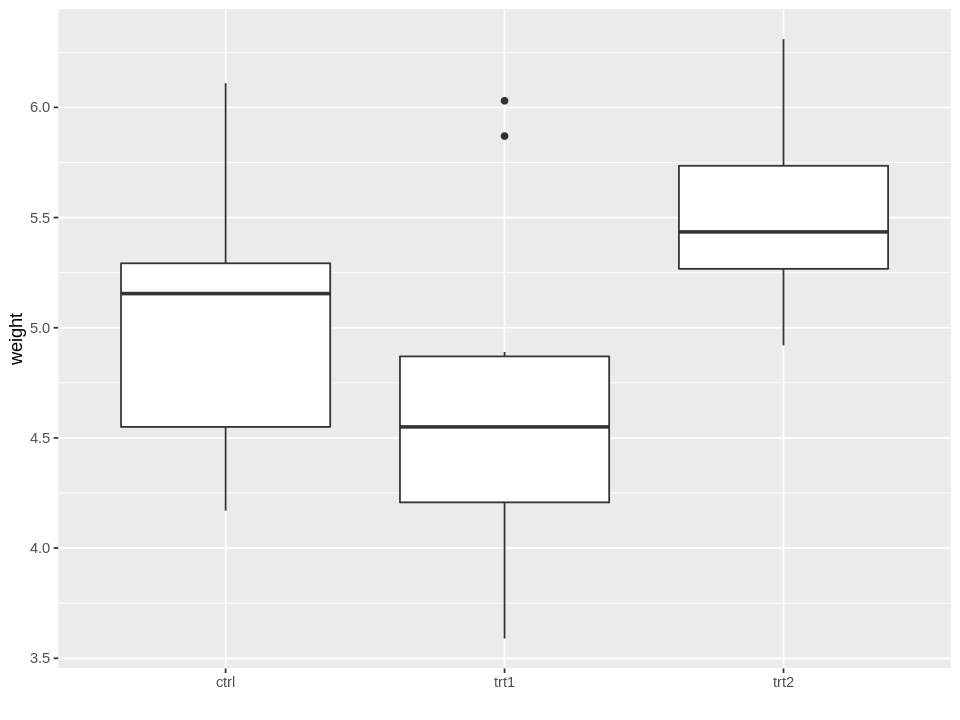

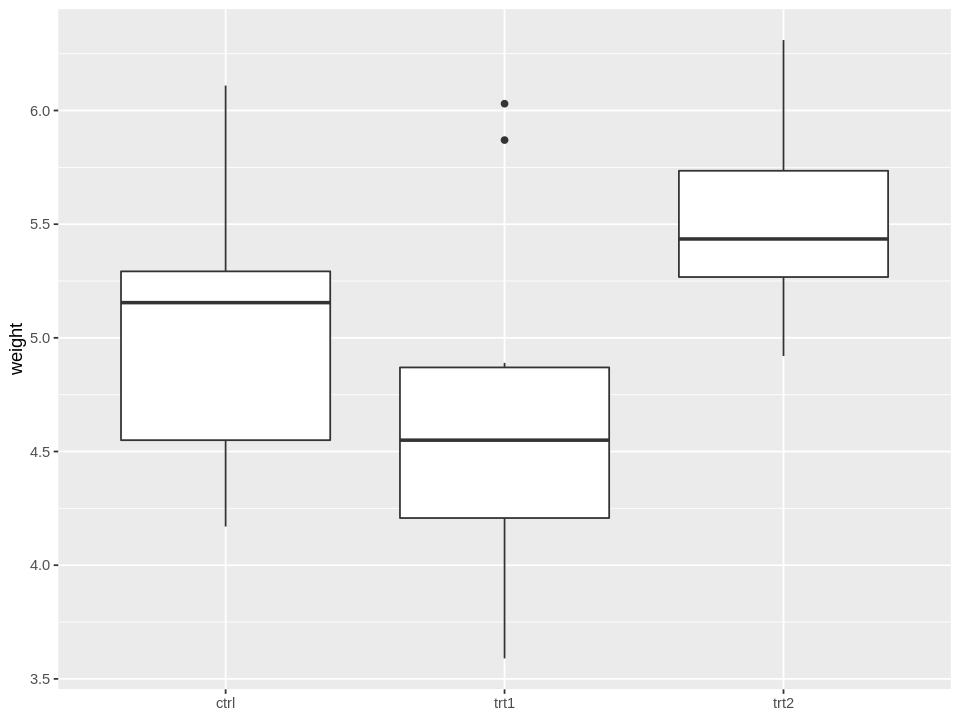

In [14]:
qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  xlab(NULL)

qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  xlab("")

qplot(group, weight, data = PlantGrowth, geom = "boxplot") +
  theme(axis.title.x = element_blank())

## 8.12 Changing the Appearance of Axis Labels

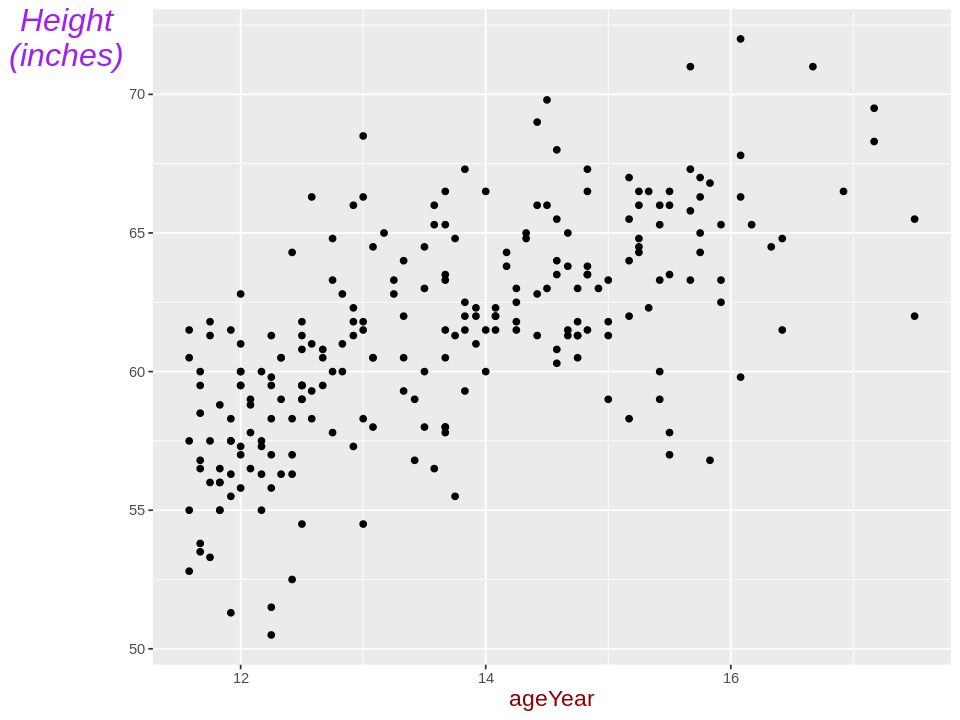

In [15]:
qplot(ageYear, heightIn, data = gcookbook::heightweight) +
  ylab("Height\n(inches)") +
  theme(
    axis.title.x = element_text(color = "darkred", size = rel(1.25)),
    axis.title.y = element_text(
      angle = 0,
      color = "purple",
      face = "italic",
      size = rel(1.75)
    )
  )

## 8.13 Showing Lines Along the Axes

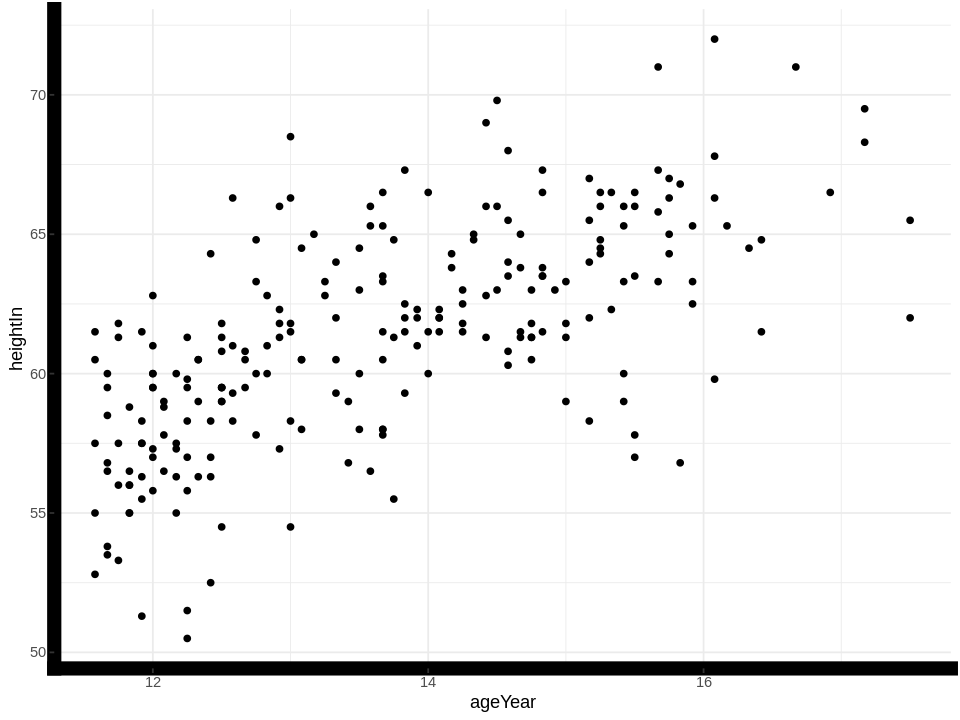

In [16]:
qplot(ageYear, heightIn, data = gcookbook::heightweight) +
  theme_bw() +
  theme(
    axis.line = element_line(lineend = "square", size = 4),
    panel.border = element_blank()
  )

## 8.14 Using a Logarithmic Axis

> With a log axis, a given visual distance represents a constant *proportional* change; for example, each centimeter on the y-axis might represent a multiplication of the quantity by 10. In contrast, with a linear axis, a given visual distance represents a constant quantity change; each centimeter might represent adding 10 to the quantity.

> This is a case where the data is distributed exponentially on both axes.

In [17]:
summary(MASS::Animals)
slice_sample(MASS::Animals, n = 10)
?MASS::Animals

      body              brain        
 Min.   :    0.02   Min.   :   0.40  
 1st Qu.:    3.10   1st Qu.:  22.23  
 Median :   53.83   Median : 137.00  
 Mean   : 4278.44   Mean   : 574.52  
 3rd Qu.:  479.00   3rd Qu.: 420.00  
 Max.   :87000.00   Max.   :5712.00  

,body,brain
,<dbl>,<dbl>
Giraffe,529.00,680.0
Triceratops,9400.00,70.0
Sheep,55.50,175.0
Human,62.00,1320.0
Guinea pig,1.04,5.5
Dipliodocus,11700.00,50.0
Goat,27.66,115.0
Pig,192.00,180.0
Rat,0.28,1.9


Animals {MASS},R Documentation


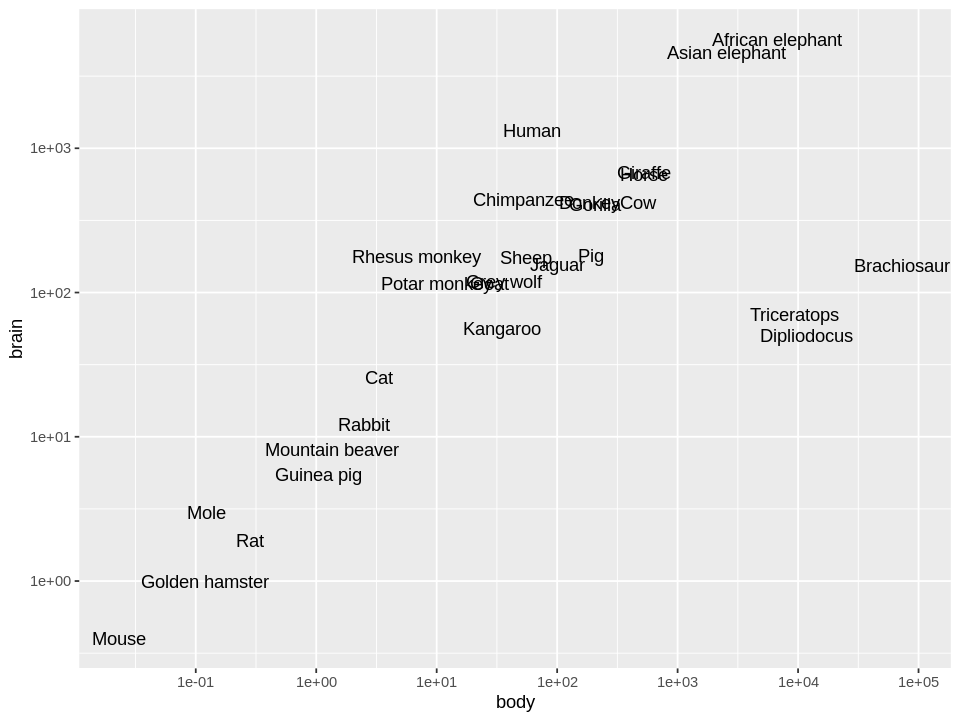

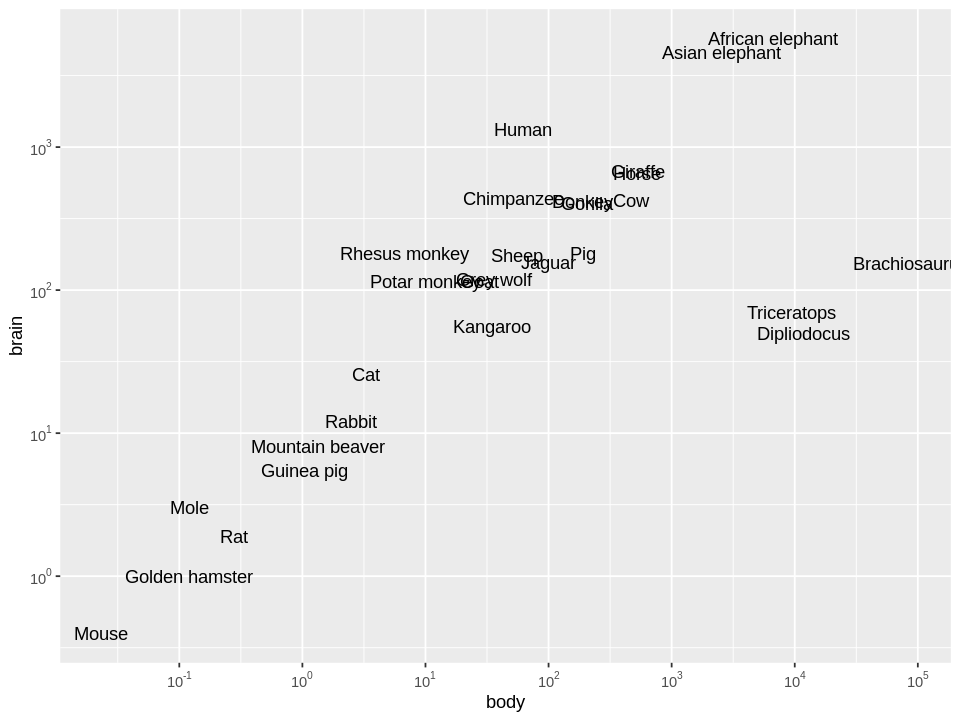

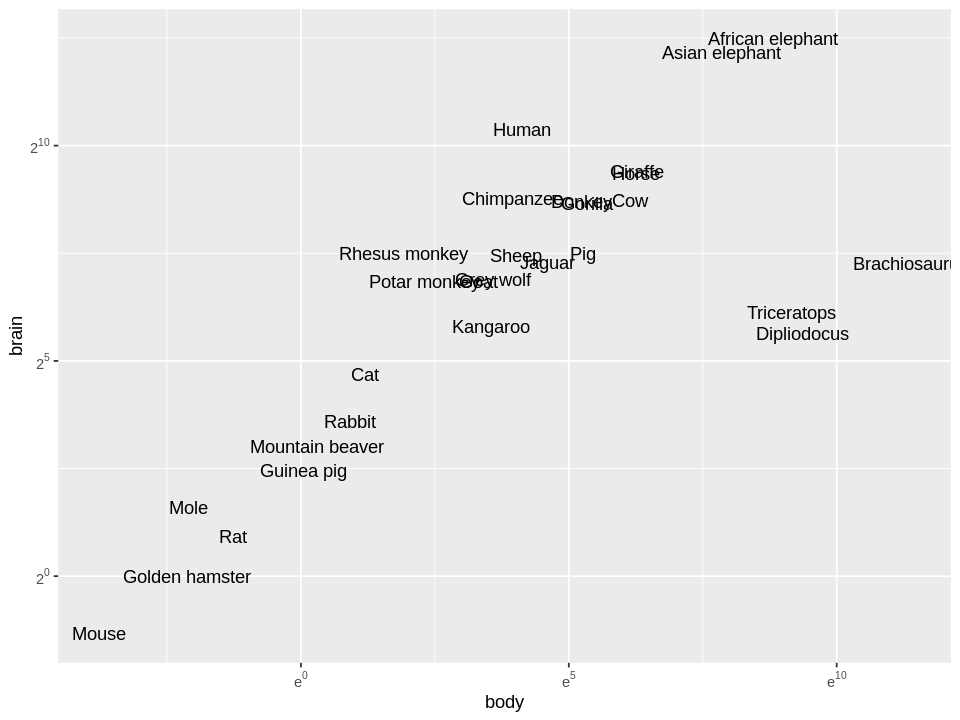

In [18]:
ggplot(MASS::Animals, aes(body, brain)) +
  geom_text(label = rownames(MASS::Animals)) +
  scale_x_log10(breaks = 10^(-1:10)) +
  scale_y_log10(breaks = 10^(-1:10), labels = scales::scientific)

ggplot(MASS::Animals, aes(body, brain)) +
  geom_text(label = rownames(MASS::Animals)) +
  scale_x_log10(
    breaks = 10^(-1:10),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  ) +
  scale_y_log10(
    breaks = 10^(-1:10),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  )

ggplot(MASS::Animals, aes(body, brain)) +
  geom_text(label = rownames(MASS::Animals)) +
  scale_x_continuous(
    breaks = scales::trans_breaks("log", function(x) exp(x)),
    labels = scales::trans_format("log", scales::math_format(e^.x)),
    trans = scales::log_trans()
  ) +
  scale_y_continuous(
    breaks = scales::trans_breaks("log2", function(x) 2^x),
    labels = scales::trans_format("log2", scales::math_format(2^.x)),
    trans = scales::log_trans()
  )

> It’s possible to use a log axis for just one axis. It is often useful to represent financial data this way, because it better represents proportional change.

In [19]:
summary(gcookbook::aapl)
slice_sample(gcookbook::aapl, n = 10)
?gcookbook::aapl

      date              adj_price        
 Min.   :1980-12-12   Min.   :  0.00921  
 1st Qu.:1990-04-18   1st Qu.:  0.14501  
 Median :1999-08-23   Median :  0.86206  
 Mean   :1999-08-23   Mean   : 19.78911  
 3rd Qu.:2008-12-27   3rd Qu.: 15.78282  
 Max.   :2018-04-30   Max.   :179.28864  

date,adj_price
<date>,<dbl>
2001-12-21,1.011534
2005-11-25,6.679980
1995-12-01,0.906166
1994-09-23,0.537791
2009-08-28,16.382040
1984-12-07,0.022054
2011-08-19,34.298717
1998-05-08,0.733061
1995-12-22,0.776714


aapl {gcookbook},R Documentation


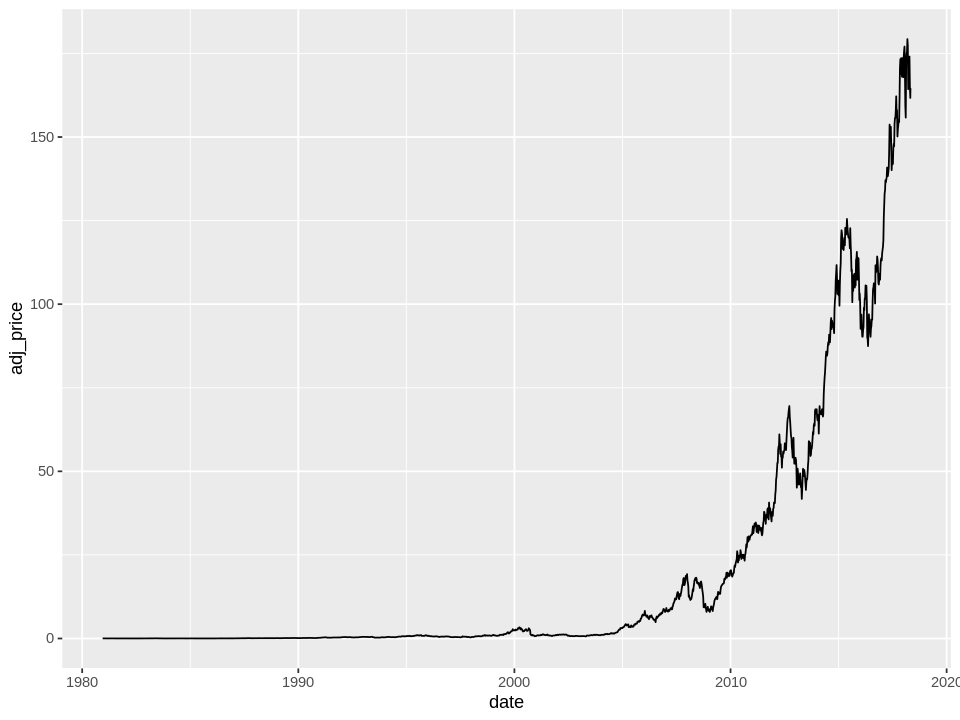

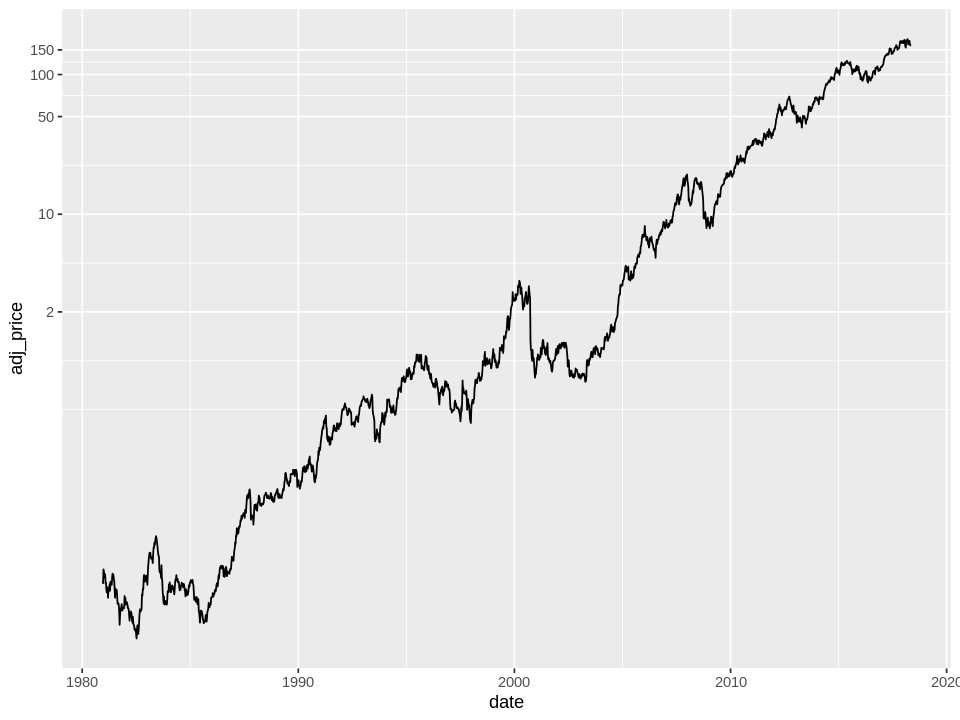

In [20]:
qplot(date, adj_price, data = gcookbook::aapl, geom = "line")

qplot(date, adj_price, data = gcookbook::aapl, geom = "line") +
  scale_y_log10(breaks = c(2, 10, 50, 100, 150))

## 8.15 Adding Ticks for a Logarithmic Axis

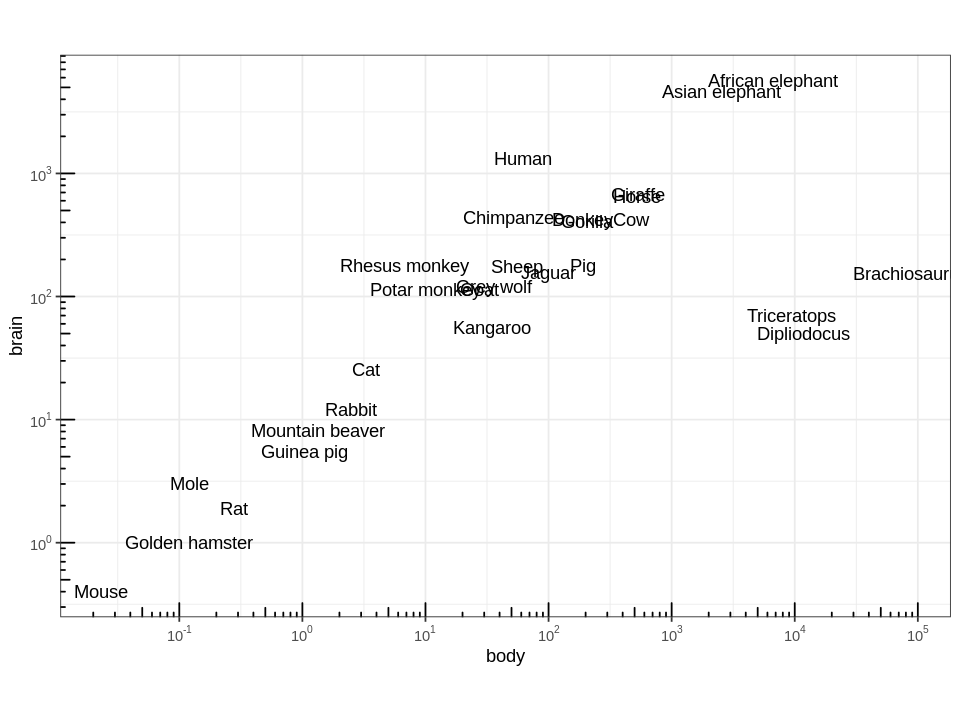

In [21]:
ggplot(MASS::Animals, aes(body, brain)) +
  geom_text(label = rownames(MASS::Animals)) +
  scale_x_log10(
    breaks = scales::breaks_log(6),
    labels = scales::trans_format(log10, scales::math_format(10^.x))
  ) +
  scale_y_log10(
    breaks = scales::breaks_log(6),
    labels = scales::trans_format(log10, scales::math_format(10^.x))
  ) +
  annotation_logticks() +
  coord_fixed() +
  theme_bw()

## 8.16 Making a Circular Plot

> Be cautious when using polar plots, since they can perceptually distort the data. In the example here, at 210 degrees there are 15 observations with a speed of 15–20 and 13 observations with a speed of >20, but a quick glance at the picture makes it appear that there are more observations at >20. There are also three observations with a speed of 10–15, but they’re barely visible.

> First, by default, for the variable that is mapped to *y* (or *r*), the smallest actual value gets mapped to the center; in other words, the smallest data value gets mapped to a visual radius value of 0. You may be expecting a data value of 0 to be mapped to a radius of 0, but to make sure this happens, you’ll need to set the limits.

> Next, when using a continuous *x* (or *theta*), the smallest and largest data values are merged. Sometimes this is desirable, sometimes not. To change this behavior, you’ll need to set the limits.

> Finally, the *theta* values of the polar coordinates do not wrap around—it is presently not possible to have a geom that crosses over the starting angle (usually vertical).

> Notice the use of the `%+%` operator. When you add a data frame to a **ggplot** object with `%+%`, it replaces the default data frame in the **ggplot** object.

In [22]:
summary(gcookbook::wind)
slice_sample(gcookbook::wind, n = 10)
?gcookbook::wind

    TimeUTC            Temp           WindAvg          WindMax     
 Min.   :   0.0   Min.   : 2.860   Min.   : 6.250   Min.   : 7.06  
 1st Qu.: 566.2   1st Qu.: 3.353   1st Qu.: 8.287   1st Qu.: 9.31  
 Median :1152.5   Median : 4.205   Median :10.065   Median :11.81  
 Mean   :1169.3   Mean   : 7.206   Mean   :11.034   Mean   :13.56  
 3rd Qu.:1748.8   3rd Qu.:12.585   3rd Qu.:13.730   3rd Qu.:18.23  
 Max.   :2345.0   Max.   :14.560   Max.   :18.980   Max.   :26.17  
    WindDir       SpeedCat       DirCat     
 Min.   : 89.0   <5   :  0   Min.   : 90.0  
 1st Qu.:128.0   5-10 :104   1st Qu.:135.0  
 Median :154.0   10-15: 85   Median :150.0  
 Mean   :170.5   15-20: 48   Mean   :170.5  
 3rd Qu.:218.0   >20  : 49   3rd Qu.:225.0  
 Max.   :268.0               Max.   :270.0  

TimeUTC,Temp,WindAvg,WindMax,WindDir,SpeedCat,DirCat
<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>
315,3.32,8.79,9.80,124,5-10,120
1425,10.53,8.39,10.29,200,10-15,195
110,3.58,8.16,8.62,96,5-10,90
1840,13.26,15.08,19.11,216,15-20,210
935,3.98,11.34,12.84,135,10-15,135
1000,3.80,11.97,13.23,133,10-15,135
2045,13.60,15.85,20.48,229,>20,225
720,3.06,10.89,12.15,130,10-15,135
415,3.16,7.83,8.53,122,5-10,120


wind {gcookbook},R Documentation


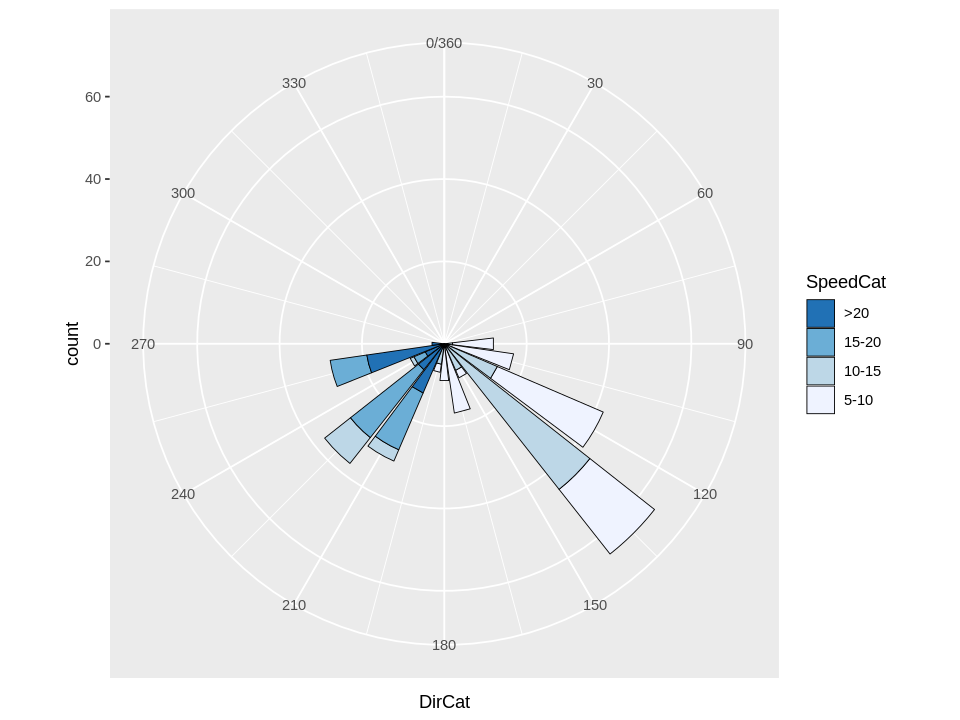

In [23]:
ggplot(gcookbook::wind, aes(DirCat, fill = SpeedCat)) +
  geom_bar(color = "black", size = .25) +
  scale_x_continuous(
    breaks = seq(0, 360, 30),
    limits = c(0, 360)
  ) +
  scale_fill_brewer() +
  guides(fill = guide_legend(reverse = TRUE)) +
  coord_polar()

In [24]:
summary(mdeaths)
?mdeaths

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    940    1138    1344    1496    1846    2750 

UKLungDeaths {datasets},R Documentation


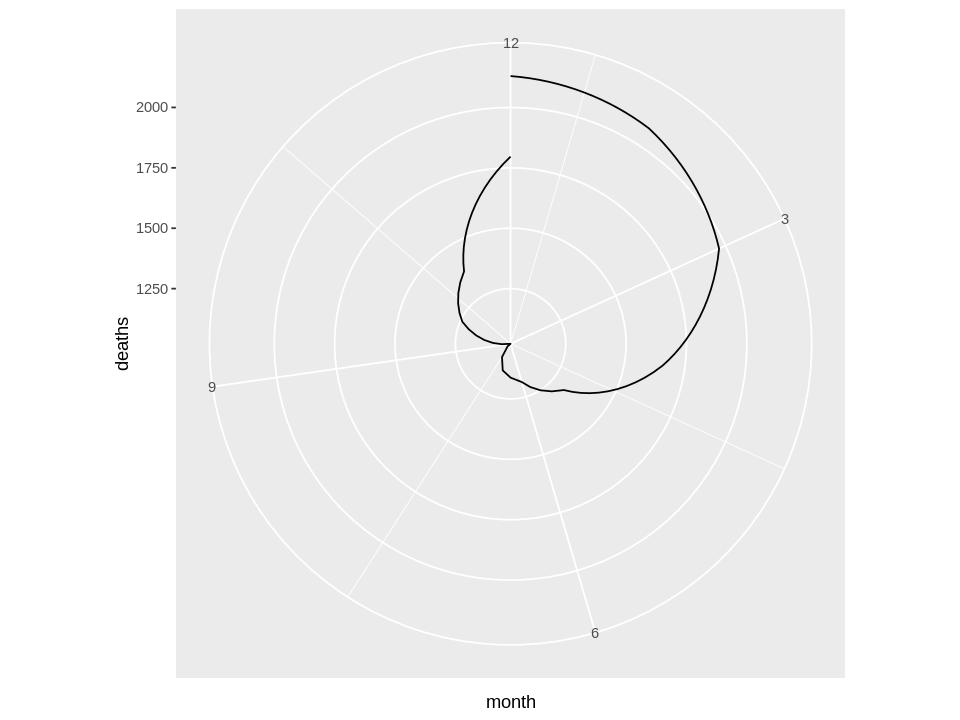

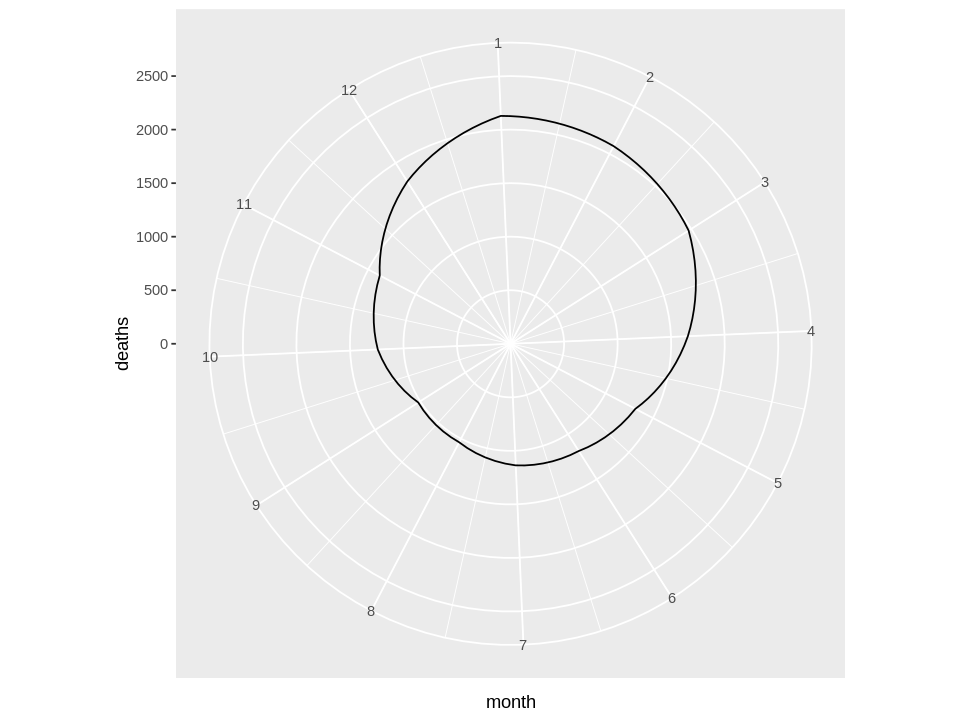

In [25]:
tibble(
  deaths = as.numeric(mdeaths),
  month = as.numeric(cycle(mdeaths))
) %>%
  group_by(month) %>%
  summarise(deaths = mean(deaths), .groups = "drop") %>%
  qplot(month, deaths, data = ., geom = "line") +
  coord_polar()

tibble(
  deaths = as.numeric(mdeaths),
  month = as.numeric(cycle(mdeaths))
) %>%
  group_by(month) %>%
  summarise(deaths = mean(deaths), .groups = "drop") %>%
  (function(df) {
    bind_rows(df, mutate(filter(df, month == 12), month = 0))
  }) %>%
  qplot(month, deaths, data = ., geom = "line") +
  scale_x_continuous(breaks = 1:12, limits = c(0, 12)) +
  scale_y_continuous(limits = c(0, 2500)) +
  coord_polar(start = 12)

## 8.17 Using Dates on an Axis

> **ggplot** handles two kinds of time-related objects: dates (objects of class `Date`) and date-times (objects of class `POSIXt`). The difference between these is that `Date` objects represent dates and have a resolution of one day, while `POSIXt` objects represent moments in time and have a resolution of a fraction of a second.

In [26]:
summary(economics)
slice_sample(economics, n = 10)
?economics

      date                 pce               pop            psavert      
 Min.   :1967-07-01   Min.   :  506.7   Min.   :198712   Min.   : 2.200  
 1st Qu.:1979-06-08   1st Qu.: 1578.3   1st Qu.:224896   1st Qu.: 6.400  
 Median :1991-05-16   Median : 3936.8   Median :253060   Median : 8.400  
 Mean   :1991-05-17   Mean   : 4820.1   Mean   :257160   Mean   : 8.567  
 3rd Qu.:2003-04-23   3rd Qu.: 7626.3   3rd Qu.:290291   3rd Qu.:11.100  
 Max.   :2015-04-01   Max.   :12193.8   Max.   :320402   Max.   :17.300  
    uempmed          unemploy    
 Min.   : 4.000   Min.   : 2685  
 1st Qu.: 6.000   1st Qu.: 6284  
 Median : 7.500   Median : 7494  
 Mean   : 8.609   Mean   : 7771  
 3rd Qu.: 9.100   3rd Qu.: 8686  
 Max.   :25.200   Max.   :15352  

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1968-03-01,544.3,200056,11.7,4.1,2877
2005-03-01,8569.5,295287,3.6,9.3,7737
1971-08-01,704.9,207881,13.6,6.4,5134
1990-11-01,3871.9,251346,7.9,5.7,7764
1983-05-01,2245.9,233922,9.9,12.3,11154
1996-08-01,5275.0,269976,6.6,8.4,6882
2009-09-01,9883.4,307946,5.9,17.8,15009
1973-02-01,825.8,211120,12.5,5.2,4452
1989-07-01,3585.7,247342,8.2,5.6,6495


economics {ggplot2},R Documentation


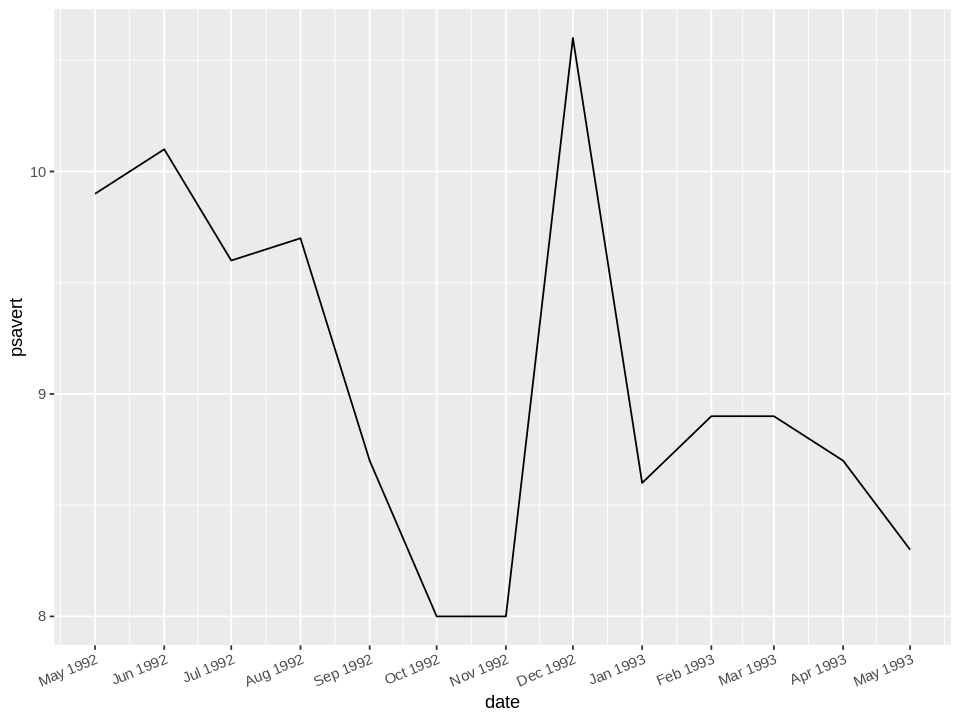

In [27]:
filter(economics, date >= "1992-05-01", date < "1993-06-01") %>%
  qplot(date, psavert, data = ., geom = "line") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  theme(axis.text.x = element_text(angle = 90 / 4, hjust = 1, vjust = 1))

## 8.18 Using Relative Times on an Axis

In [28]:
summary(WWWusage)
?WWWusage

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   83.0    99.0   138.5   137.1   167.5   228.0 

WWWusage {datasets},R Documentation


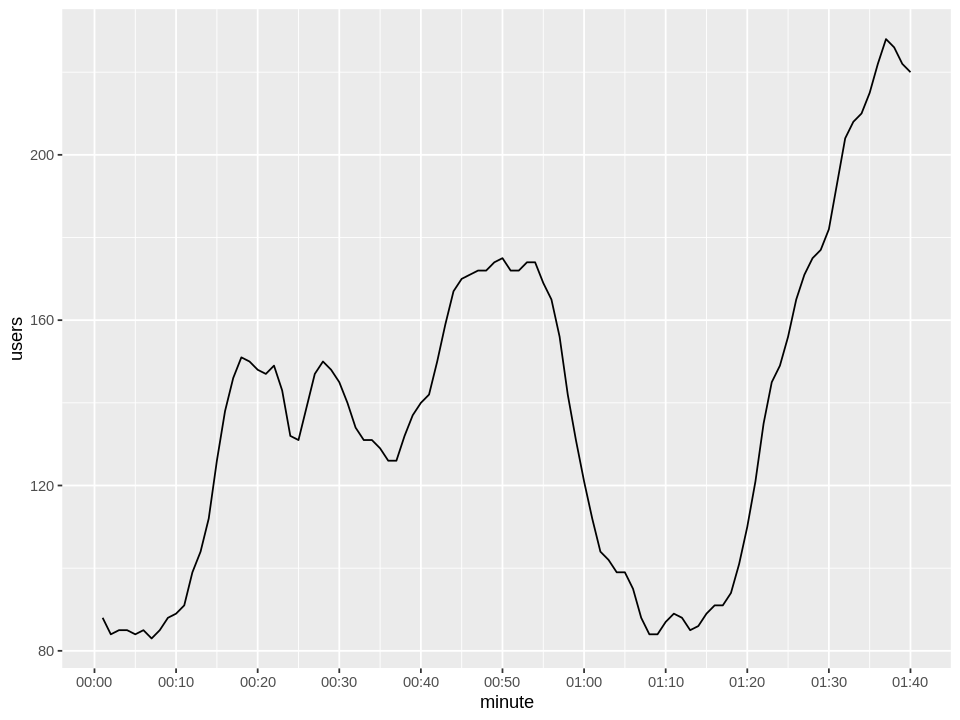

In [29]:
tibble(
  minute = lubridate::make_datetime() + lubridate::dminutes(as.numeric(time(WWWusage))),
  users = as.numeric(WWWusage)
) %>%
  qplot(minute, users, data = ., geom = "line") +
  scale_x_datetime(
    breaks = lubridate::make_datetime() + 10 * lubridate::dminutes(0:100),
    date_labels = "%H:%M"
  )